In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Import the dataframe
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, skipinitialspace=True) 

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


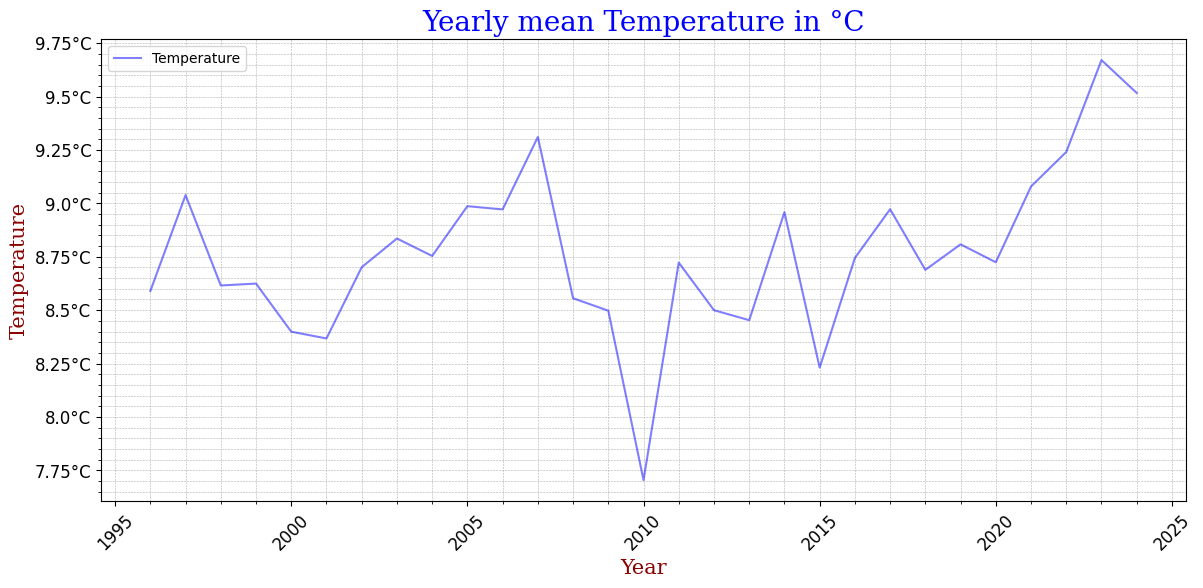

In [ ]:
#Plot the yearly max/min/mean temperatures

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')

# Group by the year extracted from the 'date' column and get the mean temperature
yearly_mean_temp = df.groupby(df['Date/Time (utc)'].dt.year)['Temperature (°C)'].mean()
yearly_min_temp = df.groupby(df['Date/Time (utc)'].dt.year)['Temperature (°C)'].min()
yearly_max_temp = df.groupby(df['Date/Time (utc)'].dt.year)['Temperature (°C)'].max()

# Create a function to format the temperature values on the y-axis
def temperature_formatter(date, pos):
    s = f"{date}\N{DEGREE SIGN}C"
    return s

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the date vs the temperature
ax.plot(yearly_mean_temp, color=colors[0], alpha=0.5, label="mean")


#Set the title
ax.set_title('Yearly mean Temperature in °C', fontdict = font1)
#Set the x and y lables
ax.set_xlabel('Year' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2)

ax.yaxis.set_major_formatter(temperature_formatter)

#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)


#Add ticks to the plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


#Add a legend
plt.legend(['Temperature'], loc='upper left')
ax.minorticks_on()


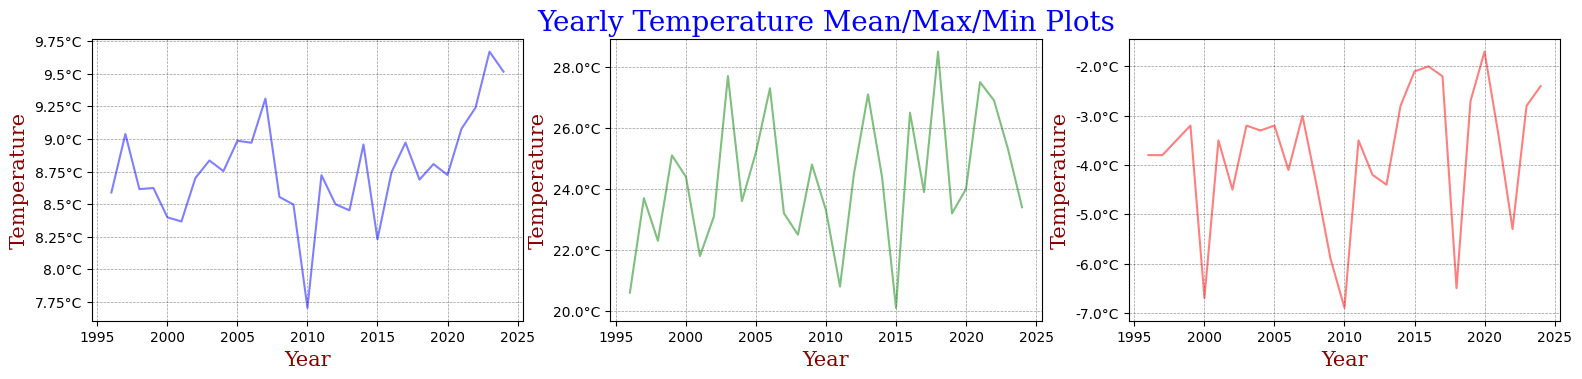

In [14]:


#Create a subplot with two plots side by side. sharex='col' means that the x-axis will be shared between the two plots.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharex='col')

#Adjust the layout of the plots. tight_layout() automatically adjusts the positions of the axes to prevent overlapping.
fig.tight_layout(pad=3.2)


ax[0].plot(yearly_mean_temp, color=colors[0], alpha=0.5, label="mean")

ax[1].plot(yearly_max_temp, color=colors[1], alpha=0.5, label="max")

ax[2].plot(yearly_min_temp, color=colors[2], alpha=0.5, label="min")

#Set the title of the seaborn plot
ax[1].set_title('Yearly Temperature Mean/Max/Min Plots', fontdict=font1)

#Label the x-axis and y-axis, and add a grid.
for i in range(3):
    #Set the x-axis label and y-axis label for the histograms.
    ax[i].set_xlabel('Year', fontdict=font2)
    ax[i].set_ylabel('Temperature', fontdict=font2)
    ax[i].yaxis.set_major_formatter(temperature_formatter)
    #Add a grid
    ax[i].grid(linestyle='--', linewidth=0.5, color='black', alpha=0.4)
  

In [ ]:
_